In [ ]:
# from google.colab import drive
# import os
# drive.mount('/content/drive')
# path = '/content/drive/Shared drives/670 final'
# os.chdir(path)
# os.listdir(path)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


from sklearn.metrics import accuracy_score

In [ ]:
df_orig = pd.read_csv('UMich Dataset.csv')
df_orig.head()

,id,quickadd,isclosed,amount,industry,title,salestype,daysopen,amount_bucket,meetingcount,sales_Department,PipelineQualityModel,Won_First_Opp,Months_Open,Partner_Flag,SDR_Opportunity,Opp_Created_Date,iswon
0,0062S00000vNnD1QAK,0,1,13770.0,Manufacturing,Senior Account Executive,N,31-60 Days,"10,000-",5,Outside Sales,Data Quality,1,1,0,1,2/26/2020,1
1,0062S00000vNPfCQAW,0,0,500.0,Wholesale Trade,Senior Account Executive,N,91+ Days,500,0,Outside Sales,Data Quality,0,9,0,1,2/6/2020,0
2,0062S00000vNPq0QAG,0,1,164.0,Retail Trade,Multimedia Specialist,A,0-30 Days,100-499,0,Other,Data Quality,1,0,0,0,2/6/2020,1
3,0062S00000vNPVHQA4,0,1,7718.0,Finance and Insurance,Regional Sales Manager,A,31-60 Days,"5,000-9,999",0,Outside Sales,Data Quality,1,1,0,0,2/6/2020,1
4,0062S00000vNQhiQAG,0,1,500.0,Manufacturing,Senior Account Executive,N,31-60 Days,500,0,Outside Sales,Data Quality,0,1,0,0,2/7/2020,0


In [ ]:
df = df_orig.drop(columns=['id']).copy()

In [ ]:
df.shape

(57170, 17)

In [ ]:
df.dtypes

quickadd                  int64
isclosed                  int64
amount                  float64
industry                 object
title                    object
salestype                object
daysopen                 object
amount_bucket            object
meetingcount              int64
sales_Department         object
PipelineQualityModel     object
Won_First_Opp             int64
Months_Open               int64
Partner_Flag              int64
SDR_Opportunity           int64
Opp_Created_Date         object
iswon                     int64
dtype: object

In [ ]:
df.isna().sum()

quickadd                   0
isclosed                   0
amount                  2764
industry                   0
title                      0
salestype                  0
daysopen                1271
amount_bucket           2764
meetingcount               0
sales_Department           0
PipelineQualityModel       0
Won_First_Opp              0
Months_Open                0
Partner_Flag               0
SDR_Opportunity            0
Opp_Created_Date           0
iswon                      0
dtype: int64

In [ ]:
# remove na
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [ ]:
df.shape

(53139, 17)

### preprocessing date column

In [ ]:
df.Opp_Created_Date.head()

0    2/26/2020
1     2/6/2020
2     2/6/2020
3     2/6/2020
4     2/7/2020
Name: Opp_Created_Date, dtype: object

In [ ]:
df.Opp_Created_Date.values

array(['2/26/2020', '2/6/2020', '2/6/2020', ..., '2/6/2019', '2/6/2019',
       '2/6/2019'], dtype=object)

In [ ]:
df['Opp_Created_Date'] = pd.to_datetime(df['Opp_Created_Date'], 
                                        format = '%m/%d/%Y', 
                                        errors = 'coerce')

In [ ]:
df['Opp_Created_Year'] = df['Opp_Created_Date'].dt.year
df['Opp_Created_Month'] = df['Opp_Created_Date'].dt.month
df['Opp_Created_Day'] = df['Opp_Created_Date'].dt.day
df['Opp_Created_Week'] = df['Opp_Created_Date'].dt.isocalendar().week

In [ ]:
df

,quickadd,isclosed,amount,industry,title,salestype,daysopen,amount_bucket,meetingcount,sales_Department,...,Won_First_Opp,Months_Open,Partner_Flag,SDR_Opportunity,Opp_Created_Date,iswon,Opp_Created_Year,Opp_Created_Month,Opp_Created_Day,Opp_Created_Week
0,0,1,13770.0,Manufacturing,Senior Account Executive,N,31-60 Days,"10,000-",5,Outside Sales,...,1,1,0,1,2020-02-26,1,2020,2,26,9
1,0,0,500.0,Wholesale Trade,Senior Account Executive,N,91+ Days,500,0,Outside Sales,...,0,9,0,1,2020-02-06,0,2020,2,6,6
2,0,1,164.0,Retail Trade,Multimedia Specialist,A,0-30 Days,100-499,0,Other,...,1,0,0,0,2020-02-06,1,2020,2,6,6
3,0,1,7718.0,Finance and Insurance,Regional Sales Manager,A,31-60 Days,"5,000-9,999",0,Outside Sales,...,1,1,0,0,2020-02-06,1,2020,2,6,6
4,0,1,500.0,Manufacturing,Senior Account Executive,N,31-60 Days,500,0,Outside Sales,...,0,1,0,0,2020-02-07,0,2020,2,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53134,1,1,0.0,Construction,Customer Success Manager,A,0-30 Days,0-99,0,Internal Accounts,...,1,0,1,0,2019-02-04,1,2019,2,4,6
53135,0,1,0.0,Manufacturing,Senior Account Executive,A,0-30 Days,0-99,0,Outside Sales,...,0,0,0,1,2019-02-04,1,2019,2,4,6
53136,0,1,3229.0,Finance and Insurance,Senior Account Executive,N,91+ Days,"1,000-4,999",0,Outside Sales,...,0,14,0,1,2019-02-06,0,2019,2,6,6
53137,0,1,1982.0,Finance and Insurance,Senior Account Executive,N,91+ Days,"1,000-4,999",0,Outside Sales,...,0,4,0,1,2019-02-06,0,2019,2,6,6


In [ ]:
df.columns

array(['quickadd', 'isclosed', 'amount', 'industry', 'title', 'salestype',
       'daysopen', 'amount_bucket', 'meetingcount', 'sales_Department',
       'PipelineQualityModel', 'Won_First_Opp', 'Months_Open',
       'Partner_Flag', 'SDR_Opportunity', 'Opp_Created_Date', 'iswon',
       'Opp_Created_Year', 'Opp_Created_Month', 'Opp_Created_Day',
       'Opp_Created_Week'], dtype=object)

#### oridinal enncoding + label encoding

In [ ]:
amount_bucket = df.amount_bucket.unique().tolist()
amount_bucket.sort()
amount_bucket

['0-99', '1,000-4,999', '10,000-', '100-499', '5,000-9,999', '500', '501-999']

In [ ]:
daysopen = df.daysopen.unique().tolist()
daysopen

['31-60 Days', '91+ Days', '0-30 Days', '61-90 Days']

In [ ]:
def onehotenc(df_cat):
    enc = OneHotEncoder(handle_unknown='ignore').fit(df_cat)
    col_names = enc.get_feature_names(df_cat.columns)
    output = pd.DataFrame(enc.transform(df_cat).toarray(),columns=col_names)
    return output

def labelenc(df_cat):
    for col in df_cat.columns:
        df_cat[col] = LabelEncoder().fit_transform(df_cat[col])
    return df_cat

def amount_bucket_daysopen(row):
#     ['0-99', '100-499', '500', '501-999', '1,000-4,999', '5,000-9,999', '10,000-']
    if row['amount_bucket'] == '0-99':
        row['amount_bucket'] = 50
    elif row['amount_bucket'] == '100-499':
        row['amount_bucket'] = 300
    elif row['amount_bucket'] == '500':
        row['amount_bucket'] = 500
    elif row['amount_bucket'] == '501-999':
        row['amount_bucket'] = 750
    elif row['amount_bucket'] == '1,000-4,999':
        row['amount_bucket'] = 3000
    elif row['amount_bucket'] == '5,000-9,999':
        row['amount_bucket'] = 7500
    elif row['amount_bucket'] == '10,000-':
        row['amount_bucket'] = 10000
    
#     ['0-30 Days', '31-60 Days', '61-90 Days', '91+ Days']
    if row['daysopen'] == '0-30 Days':
        row['daysopen'] = 15
    elif row['daysopen'] == '31-60 Days':
        row['daysopen'] = 45
    elif row['daysopen'] == '61-90 Days':
        row['daysopen'] = 75
    elif row['daysopen'] == '91+ Days':
        row['daysopen'] = 105
    
    return row
    

In [ ]:
# label encoder
df_cat = df[['industry','title','salestype','sales_Department','PipelineQualityModel']].copy()
df_cat = labelenc(df_cat)
df_num = df.drop(columns=['industry','title','salestype','sales_Department','PipelineQualityModel'])
# df_clean = pd.concat([df_num,onehotenc(df_cat)],axis=1)
df_mod = pd.concat([df_num,df_cat],axis=1)

In [ ]:
df_clean = df_mod.apply(lambda row: amount_bucket_daysopen(row), axis=1).drop(columns='Opp_Created_Date')
df_clean.head(15)

,quickadd,isclosed,amount,daysopen,amount_bucket,meetingcount,Won_First_Opp,Months_Open,Partner_Flag,SDR_Opportunity,iswon,Opp_Created_Year,Opp_Created_Month,Opp_Created_Day,Opp_Created_Week,industry,title,salestype,sales_Department,PipelineQualityModel
0,0,1,13770.0,45,10000,5,1,1,0,1,1,2020,2,26,9,10,42,1,4,1
1,0,0,500.0,105,500,0,0,9,0,1,0,2020,2,6,6,21,42,1,4,1
2,0,1,164.0,15,300,0,1,0,0,0,1,2020,2,6,6,17,27,0,3,1
3,0,1,7718.0,45,7500,0,1,1,0,0,1,2020,2,6,6,6,30,0,4,1
4,0,1,500.0,45,500,0,0,1,0,0,0,2020,2,7,6,10,42,1,4,1
5,0,1,500.0,105,500,0,0,5,0,1,0,2020,2,7,6,15,42,1,4,1
6,0,1,76.0,15,50,0,1,0,0,1,1,2020,3,2,10,10,42,0,4,0
7,0,1,244.0,75,300,1,0,2,0,1,1,2020,2,7,6,14,0,1,1,1
8,0,0,500.0,105,500,0,0,9,0,1,0,2020,2,8,6,9,42,0,4,1
9,0,0,1636.0,105,3000,0,0,8,1,1,0,2020,3,3,10,17,30,1,4,1


### some analysis

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

For all continuous variables, the correlation value between each pairs is comparetively low. As a results, we can assume that the continuous variables in the dataset are independent variables to each other.

<AxesSubplot:>

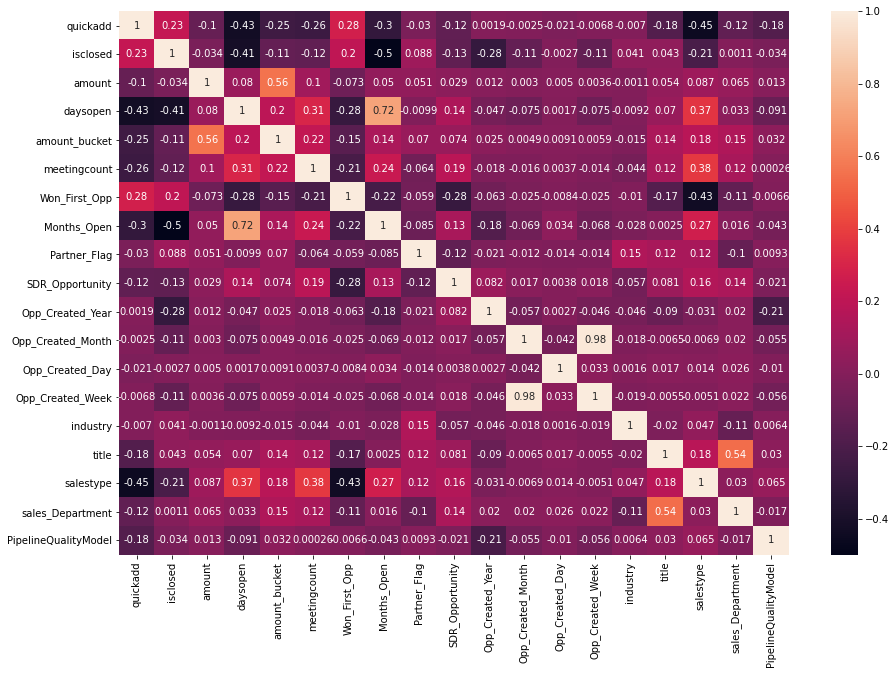

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_clean.drop(columns='iswon').corr(), annot=True)

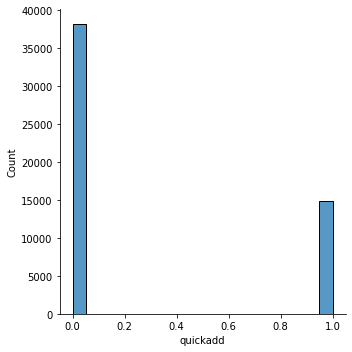

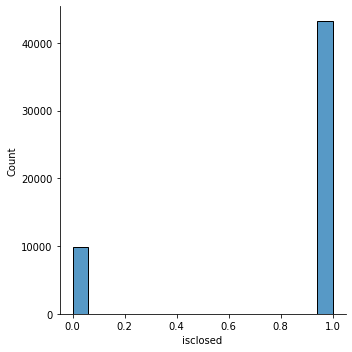

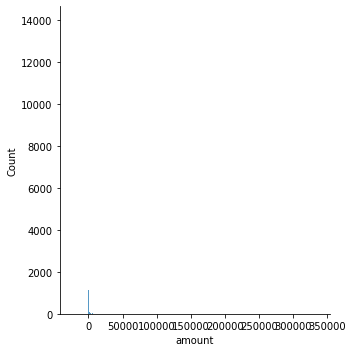

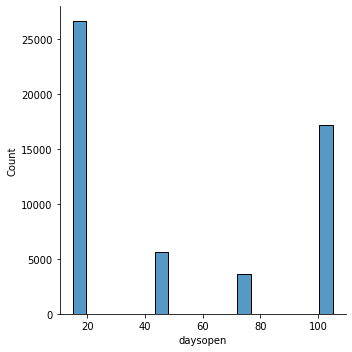

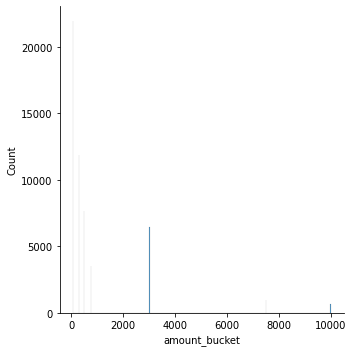

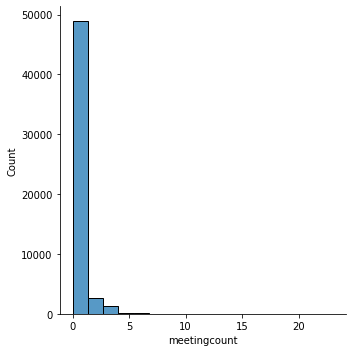

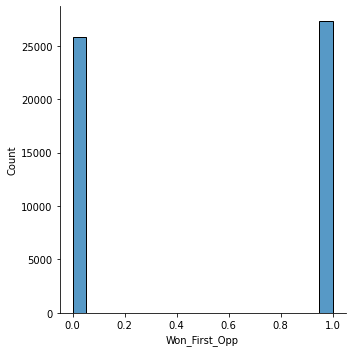

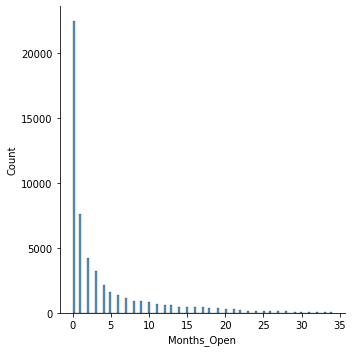

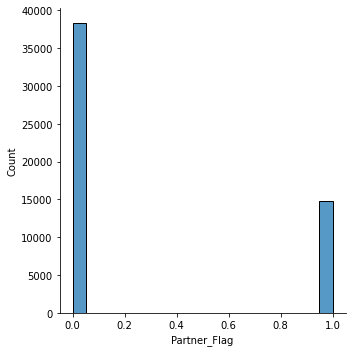

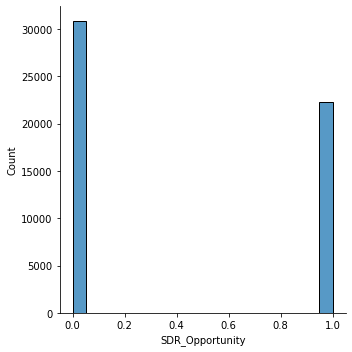

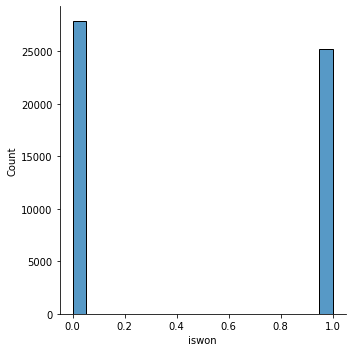

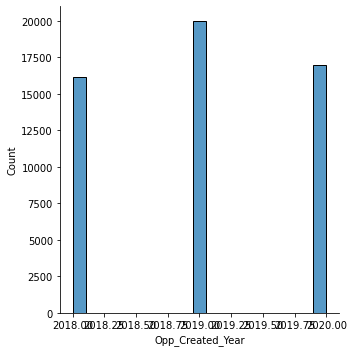

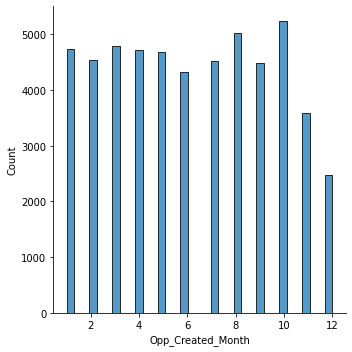

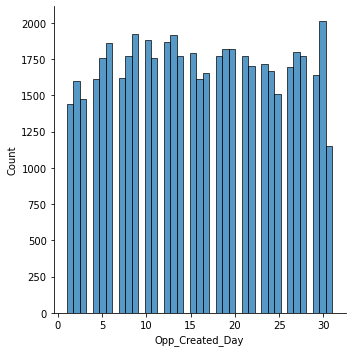

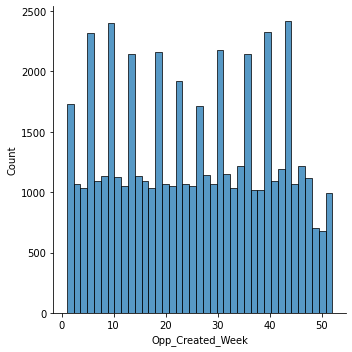

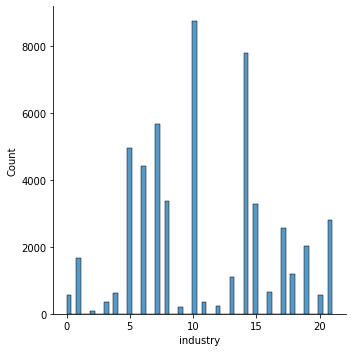

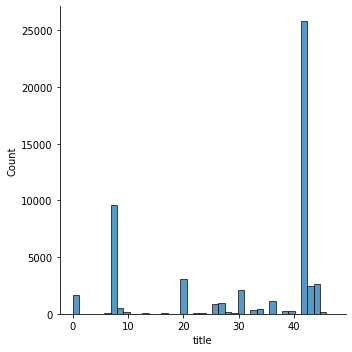

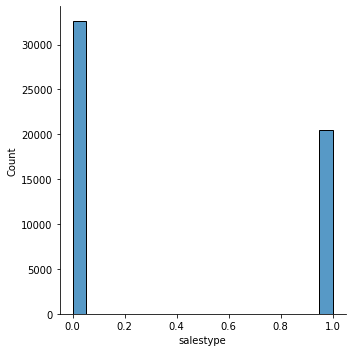

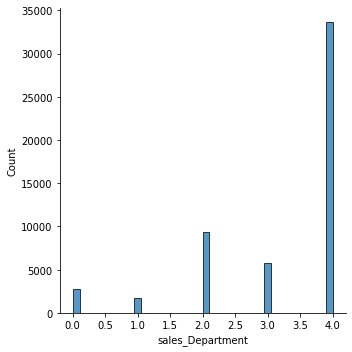

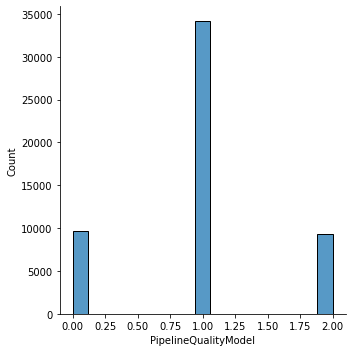

In [ ]:
for column in df_clean.columns:
    sns.displot(df_clean[column])

In [ ]:
'iswon' in df_clean.columns.tolist()

True

### all features

In [ ]:
df_train = df_clean[df_clean['isclosed']==1].drop(columns='isclosed')
df_test = df_clean[df_clean['isclosed']==0].drop(columns='isclosed')

X_train_val = df_train.drop(columns='iswon')
y_train_val = df_train['iswon']

X_test = df_test.drop(columns='iswon')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val)

In [ ]:
print(X_train.shape, X_val.shape, '\n', y_train.shape, y_val.shape)

(32409, 18) (10803, 18) 
 (32409,) (10803,)


In [ ]:
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_val_scaled = mm_scaler.transform(X_val)

sd_scaler = StandardScaler()
X_train_scaled = sd_scaler.fit_transform(X_train_scaled)
X_val_scaled = mm_scaler.transform(X_val_scaled)

In [ ]:
# logistic regression
clf = LogisticRegression()
clf.fit(X_train_scaled,y_train)
pred_lr = clf.predict(X_val_scaled)
clf.score(X_val_scaled,y_val)

0.5856706470424882

In [ ]:
# Knn
clf = KNeighborsClassifier()
clf.fit(X_train_scaled,y_train)
pred_knn = clf.predict(X_val_scaled)
clf.score(X_val_scaled,y_val)

0.7123021382949181

In [ ]:
# SVC
clf = SVC()
clf.fit(X_train_scaled,y_train)
pred_svc = clf.predict(X_val_scaled)
clf.score(X_val_scaled,y_val)

0.4143293529575118

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train_scaled,y_train)
pred_rfc = clf.predict(X_val_scaled)
clf.score(X_val_scaled,y_val)

0.6239007683051004

In [ ]:
# MLP
clf = MLPClassifier(max_iter=400)
clf.fit(X_train_scaled,y_train)
pred_mlp = clf.predict(X_val_scaled)
clf.score(X_val_scaled,y_val)

0.5856706470424882

In [ ]:
# Naive Bayes
clf = GaussianNB()
clf.fit(X_train_scaled,y_train)
pred_nb = clf.predict(X_val_scaled)
clf.score(X_val_scaled,y_val)

0.5856706470424882

In [ ]:
# Adaboost
clf = AdaBoostClassifier()
clf.fit(X_train_scaled,y_train)
pred_ada = clf.predict(X_val_scaled)
clf.score(X_val_scaled,y_val)

0.7125798389336295

In [ ]:
# GBDT
clf = GradientBoostingClassifier()
clf.fit(X_train_scaled,y_train)
pred_gbdt = clf.predict(X_val_scaled)
clf.score(X_val_scaled,y_val)

0.5959455706748126

In [ ]:
# Xgboost
clf = xgb.XGBClassifier()
clf.fit(X_train_scaled,y_train)
pred_xg = clf.predict(X_val_scaled)
clf.score(X_val_scaled,y_val)

0.5856706470424882

### features with absolute correlation >= 0.1

In [ ]:
cor = df_clean.corr()

# Correlation with output variable
cor_target = abs(cor["iswon"])

# Selecting correlated features
relevant_features = cor_target[cor_target>=0.1]
features = pd.DataFrame(relevant_features).index.tolist()

In [ ]:
df_selected = df_clean[features].copy()

In [ ]:
df_train = df_selected[df_selected['isclosed']==1].drop(columns='isclosed')
df_test = df_selected[df_selected['isclosed']==0].drop(columns='isclosed')

X_train_val = df_train.drop(columns='iswon')
y_train_val = df_train['iswon']

X_test = df_test.drop(columns='iswon')

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val)

print(X_train.shape, X_val.shape, '\n', y_train.shape, y_val.shape)

mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_val_scaled = mm_scaler.transform(X_val)

sd_scaler = StandardScaler()
X_train_scaled = sd_scaler.fit_transform(X_train_scaled)
X_val_scaled = mm_scaler.transform(X_val_scaled)

(32409, 9) (10803, 9) 
 (32409,) (10803,)


In [ ]:
# logistic regression
clf = LogisticRegression()
clf.fit(X_train_scaled,y_train)
pred_lr = clf.predict(X_val_scaled)
print(f'logistic regression: {clf.score(X_val_scaled,y_val)}')

# Knn
clf = KNeighborsClassifier()
clf.fit(X_train_scaled,y_train)
pred_knn = clf.predict(X_val_scaled)
print(f'knn: {clf.score(X_val_scaled,y_val)}')

# SVC
clf = SVC()
clf.fit(X_train_scaled,y_train)
pred_svc = clf.predict(X_val_scaled)
print(f'svc: {clf.score(X_val_scaled,y_val)}')

# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train_scaled,y_train)
pred_rfc = clf.predict(X_val_scaled)
print(f'rfc: {clf.score(X_val_scaled,y_val)}')

# MLP
clf = MLPClassifier(max_iter=400)
clf.fit(X_train_scaled,y_train)
pred_mlp = clf.predict(X_val_scaled)
print(f'mlp: {clf.score(X_val_scaled,y_val)}')

# Naive Bayes
clf = GaussianNB()
clf.fit(X_train_scaled,y_train)
pred_nb = clf.predict(X_val_scaled)
print(f'naive bayes: {clf.score(X_val_scaled,y_val)}')

# Adaboost
clf = AdaBoostClassifier()
clf.fit(X_train_scaled,y_train)
pred_ada = clf.predict(X_val_scaled)
print(f'ada: {clf.score(X_val_scaled,y_val)}')

# GBDT
clf = GradientBoostingClassifier()
clf.fit(X_train_scaled,y_train)
pred_gbdt = clf.predict(X_val_scaled)
print(f'clf: {clf.score(X_val_scaled,y_val)}')

# Xgboost
clf = xgb.XGBClassifier()
clf.fit(X_train_scaled,y_train)
pred_xg = clf.predict(X_val_scaled)
print(f'xgb: {clf.score(X_val_scaled,y_val)}')

logistic regression: 0.5818754049800982
knn: 0.6251041377395168
svc: 0.5818754049800982
rfc: 0.39405720633157454
mlp: 0.7365546607423864
naive bayes: 0.5818754049800982
ada: 0.6892529852818662
clf: 0.6509302971396834
xgb: 0.5818754049800982


In [ ]:
pred_df_2 = pd.DataFrame({
            'lr':pred_lr,
            'knn':pred_knn,
            'svc':pred_svc,
            'rfc':pred_rfc,
            'mlp':pred_mlp,
            'nb':pred_nb,
            'ada':pred_ada,
            'gbdt':pred_gbdt,
            'xg':pred_xg
            })

In [ ]:
pred_df_2

,lr,knn,svc,rfc,mlp,nb,ada,gbdt,xg
0,1,0,1,0,0,1,0,1,1
1,1,1,1,1,0,1,0,0,1
2,1,1,1,0,0,1,0,1,1
3,1,1,1,1,0,1,0,0,1
4,1,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
10798,1,1,1,0,1,1,1,1,1
10799,1,1,1,0,0,1,0,1,1
10800,1,1,1,0,1,1,1,1,1
10801,1,1,1,0,0,1,0,1,1


In [ ]:
pred_df_2['sum_'] = pred_df_2.lr + pred_df_2.knn + pred_df_2.svc + pred_df_2.rfc + pred_df_2.mlp + pred_df_2.nb + pred_df_2.ada + pred_df_2.gbdt + pred_df_2.xg



In [ ]:
pred_df_2['combine_pred'] = np.where(pred_df_2['sum_']>=8,1,0)

In [ ]:
pred_df_2

,lr,knn,svc,rfc,mlp,nb,ada,gbdt,xg,sum_,combine_pred
0,1,0,1,0,0,1,0,1,1,5,0
1,1,1,1,1,0,1,0,0,1,6,0
2,1,1,1,0,0,1,0,1,1,6,0
3,1,1,1,1,0,1,0,0,1,6,0
4,1,1,1,0,0,1,0,1,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...
10798,1,1,1,0,1,1,1,1,1,8,1
10799,1,1,1,0,0,1,0,1,1,6,0
10800,1,1,1,0,1,1,1,1,1,8,1
10801,1,1,1,0,0,1,0,1,1,6,0


In [ ]:
accuracy_score(y_val,pred_df_2.combine_pred)

0.6891604184022957

In [ ]:
pred_df_2.combine_pred.unique()

array([0, 1])

In [ ]:
pred_df_2.sum_.unique()

array([5, 6, 8, 9, 7])

### try with time split 

In [ ]:
X_train = X_train_val.reset_index().drop(columns='index')

In [ ]:
X_train.head()

,quickadd,daysopen,amount_bucket,meetingcount,Won_First_Opp,Months_Open,SDR_Opportunity,title,salestype
0,0,45,10000,5,1,1,1,42,1
1,0,15,300,0,1,0,0,27,0
2,0,45,7500,0,1,1,0,30,0
3,0,45,500,0,0,1,0,42,1
4,0,105,500,0,0,5,1,42,1


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)
i = 1
score = []
for tr_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
    y_tr, y_val = y_train_val.iloc[tr_index], y_train_val.iloc[val_index]
    
    mm_scaler = MinMaxScaler()
    X_train_scaled = mm_scaler.fit_transform(X_tr)
    X_val_scaled = mm_scaler.transform(X_val)

    sd_scaler = StandardScaler()
    X_train_scaled = sd_scaler.fit_transform(X_train_scaled)
    X_val_scaled = mm_scaler.transform(X_val_scaled)
    
    clf = MLPClassifier(max_iter=400)
    clf.fit(X_train_scaled,y_tr)
    pred_mlp = clf.predict(X_val_scaled)
    
    score.append([i, clf.score(X_val_scaled,y_val)])
    
    i += 1

In [ ]:
print(score)

[[1, 0.7401647690456354], [2, 0.6634268258816995], [3, 0.6626862908451356]]


In [ ]:
#-----------------
# features: dropped id, transform group categories into numbers
# logistic regression: 0.59
# KNN: 0.71
# SVC: 0.41
# random forest: 0.62
# MLP: 0.59 (400)
# Naive Bayes: 0.59
# Ada: 0.71
# GBDT: 0.60
# xgboost: 0.59

#-----------------
# features: dropped id, transform group categories into numbers, corr >= 0.1
# logistic regression: 0.5818754049800982
# knn: 0.6251041377395168
# svc: 0.5818754049800982
# rfc: 0.39405720633157454
# mlp: 0.7365546607423864
# naive bayes: 0.5818754049800982
# ada: 0.6892529852818662
# clf: 0.6509302971396834
# xgb: 0.5818754049800982
# sum: 0.6891604184022957